In [16]:
import geopandas as gpd
import pandas as pd

#### Shapefile dos setores censitários do Estado de Rondônia

In [2]:
gdf = gpd.read_file('Dados/densidade_populacional/RO_Setores_2010/11SEE250GC_SIR.shp')
gdf.head(2)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,17182,110009812000003,RURAL,None,None,11000981200,None,110009812,NOVO PARAÍSO,1100098,ESPIGÃO D'OESTE,CACOAL,LESTE RONDONIENSE,"POLYGON ((-60.89575 -11.35508, -60.89557 -11.3..."
1,17183,110009815000001,URBANO,None,None,11000981500,None,110009815,FLOR DA SERRA,1100098,ESPIGÃO D'OESTE,CACOAL,LESTE RONDONIENSE,"POLYGON ((-60.74999 -11.39990, -60.74913 -11.4..."


#### Filtrando apenas para Porto Velho

In [3]:
porto_velho = gdf.loc[gdf.NM_DISTRIT == 'PORTO VELHO']
porto_velho.head(2)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
384,17215,110020505090014,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,"POLYGON ((-63.84842 -8.74327, -63.84774 -8.746..."
385,17216,110020505090015,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,"POLYGON ((-63.85043 -8.74776, -63.85004 -8.749..."


#### Carregando dados de Censo demográficos agregados por Setores Censitários - 2010

In [4]:
censo = pd.read_csv('Dados/densidade_populacional/Basico_RO.csv', sep=';', encoding='ISO-8859-1')
censo.head(2)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,110001505000001,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"1,91","1000,83","844813,39","1064,05","830862,08","637,19","621087,58","916,17","637455,02",NaN
1,110001505000002,1,Região Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,0,...,"2,39","925,75","755517,65","1044,44","728301,76","555,45","511544,75","885,82","523176,78",NaN


#### Filtrando apenas para Porto Velho

In [5]:
censo_pvh = censo.loc[censo.Nome_do_distrito == 'PORTO VELHO']
censo_pvh.head(2)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
999,110020505000001,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"3,27","840,41","694889,16","1016,9","661007,67","530,49","763116,01","956,96","969496,45",NaN
1000,110020505000002,1,Região Norte,11,Rondônia,1101,Madeira-Guaporé,11001,Porto Velho,0,...,"3,92","910,49","664594,7","986,37","645060,38","486,16","426310,37","806,58","448882,15",NaN


#### Tratando os dados para fazer o merge
1. Renomear a coluna código do setor para Cod_setor ou CD_GEOCODI
2. Renomear a coluna v001 para populacao
3. Escolher as colunas úteis do censo
4. Verificar tipo de dados do CD_GEOCODI dos dois datasets

In [6]:
censo_pvh = censo_pvh.copy()  # É necessário "materializar" o sub dataset que foi criado do dataset principal

censo_pvh.rename(columns={'Cod_setor': 'CD_GEOCODI'}, inplace=True)
censo_pvh.rename(columns={'V001': 'Populacao'}, inplace=True)
censo_pvh = censo_pvh.loc[:,
            ['CD_GEOCODI', 'Cod_distrito', 'Nome_do_distrito', 'Cod_bairro', 'Nome_do_bairro', 'Populacao']]

censo_pvh.head(1)

,CD_GEOCODI,Cod_distrito,Nome_do_distrito,Cod_bairro,Nome_do_bairro,Populacao
999,110020505000001,110020505,PORTO VELHO,1100205000,PORTO VELHO (demais setores),121.0


In [7]:
porto_velho.CD_GEOCODI.dtype == censo_pvh.CD_GEOCODI.dtype

False

In [8]:
porto_velho.CD_GEOCODI.dtypes

dtype('O')

In [9]:
censo_pvh.CD_GEOCODI.dtypes

dtype('int64')

In [10]:
porto_velho = porto_velho.copy()  # É necessário "materializar" o sub dataset que foi criado do dataset principal

porto_velho.CD_GEOCODI = porto_velho.CD_GEOCODI.astype(int)

porto_velho.CD_GEOCODI.dtype == censo_pvh.CD_GEOCODI.dtype

True

#### Merge dos dados

In [11]:
setor_censitario_censo_pvh = porto_velho.merge(censo_pvh, on='CD_GEOCODI', how='inner')
setor_censitario_censo_pvh.head(2)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,Cod_distrito,Nome_do_distrito,Cod_bairro,Nome_do_bairro,Populacao
0,17215,110020505090014,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,"POLYGON ((-63.84842 -8.74327, -63.84774 -8.746...",110020505,PORTO VELHO,1100205060,Igarapé,212.0
1,17216,110020505090015,URBANO,110020505060,Igarapé,11002050509,ZONA 04,110020505,PORTO VELHO,1100205,PORTO VELHO,PORTO VELHO,MADEIRA-GUAPORÉ,"POLYGON ((-63.85043 -8.74776, -63.85004 -8.749...",110020505,PORTO VELHO,1100205060,Igarapé,256.0


#### TOP 10 - Bairros com as maiores densidades populacionais (censo 2010)

In [12]:
setor_censitario_censo_pvh.groupby('Nome_do_bairro').Populacao.sum().sort_values(ascending=False).head(10)

Nome_do_bairro
PORTO VELHO (demais setores)    20941.0
Aponiã                           4267.0
Castanheira                      3702.0
Nova Porto Velho                 3700.0
Agenor M. de Carvalho            3660.0
Cohab                            3616.0
Embratel                         3223.0
Três Marias                      2981.0
Flodoaldo Pontes Pinto           2935.0
Nova Floresta                    2918.0
Name: Populacao, dtype: float64

In [13]:
import contextily as cx
import matplotlib.pyplot as plt

#### Colormap do Verde para o Vermelho

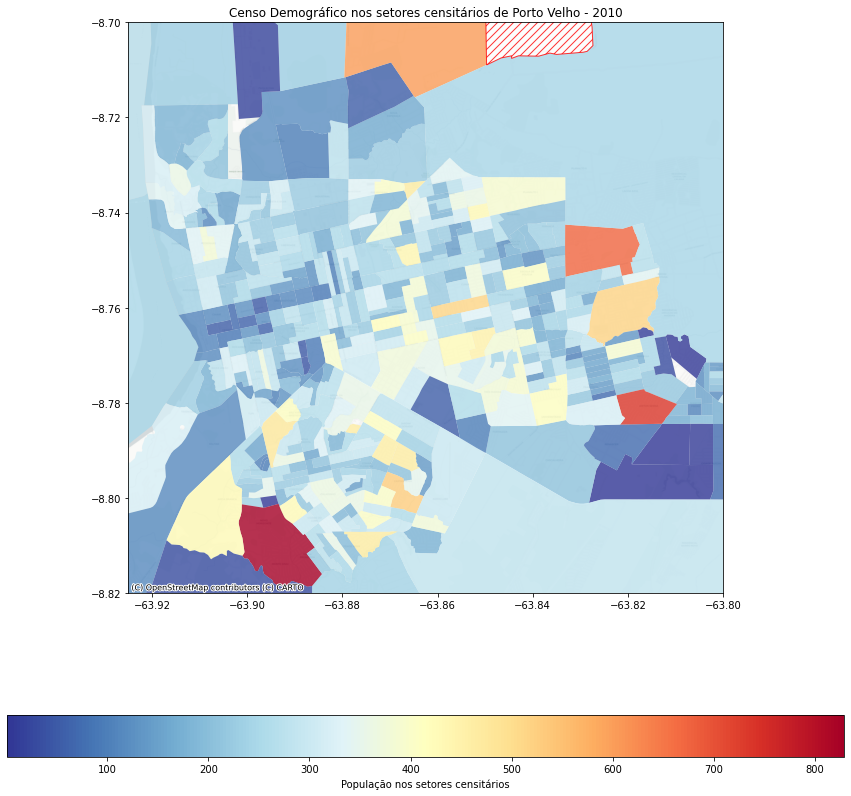

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

setor_censitario_censo_pvh.plot(ax=ax,
                                column='Populacao',
                                vmin=setor_censitario_censo_pvh.Populacao.min(),
                                vmax=setor_censitario_censo_pvh.Populacao.max(),
                                cmap='RdYlBu_r',
                                legend=True,
                                legend_kwds={'label': "População nos setores censitários", 'orientation': "horizontal"},
                                missing_kwds={'color': 'white', "hatch": "///", "edgecolor": "red", "label": "Sem dados"},
                                alpha=0.8
                                )

plt.xlim(-63.925, -63.8)
plt.ylim(-8.820, -8.7)
plt.title('Censo Demográfico nos setores censitários de Porto Velho - 2010')

cx.add_basemap(ax=ax, crs=setor_censitario_censo_pvh.crs, zoom=15, source=cx.providers.CartoDB.Positron)

In [15]:
setor_censitario_censo_pvh.to_file('Dados/densidade_populacional/Output/setor_censitario_censo_pvh.shp')

/tmp/ipykernel_24312/1405537623.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  setor_censitario_censo_pvh.to_file('Dados/densidade_populacional/Output/setor_censitario_censo_pvh.shp')
